### Team Info
Title: F1 Analysis

Team Name: Accelerated Analytics

Name: Arnay Vohra

### Project Introduction
#### Description
We will use various F1 metrics, including telemetry, weather, and tyre data, to analyze driver and car performance throughout the season and over the years.

#### Research Questions
- Does the driver or car have more effect on race and championship position?
- How is car/driver performance affected by circumstantial factors? (weather, tyres, practice timings, circuit geography, previous race results, speed, driver measurements/experience, team funding, race laps, pit performance, time of day, type of circuit, etc) 

#### Data Source(s)
We will be using a prebuilt F1 data library called Fast F1: https://theoehrly.github.io/Fast-F1/.
This library includes F1 data updated to one year ago (2021), that being lap timing, car telemetry and position, tyre data, weather data, the event schedule and session results. If necessary, we will get geographical/geospatial circuit data from Open Elevation: https://open-elevation.com/.

#### Does the driver or car have more effect on race and championship position?

In [56]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

import fastf1
import matplotlib.pyplot as plt
import pandas as pd

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18',

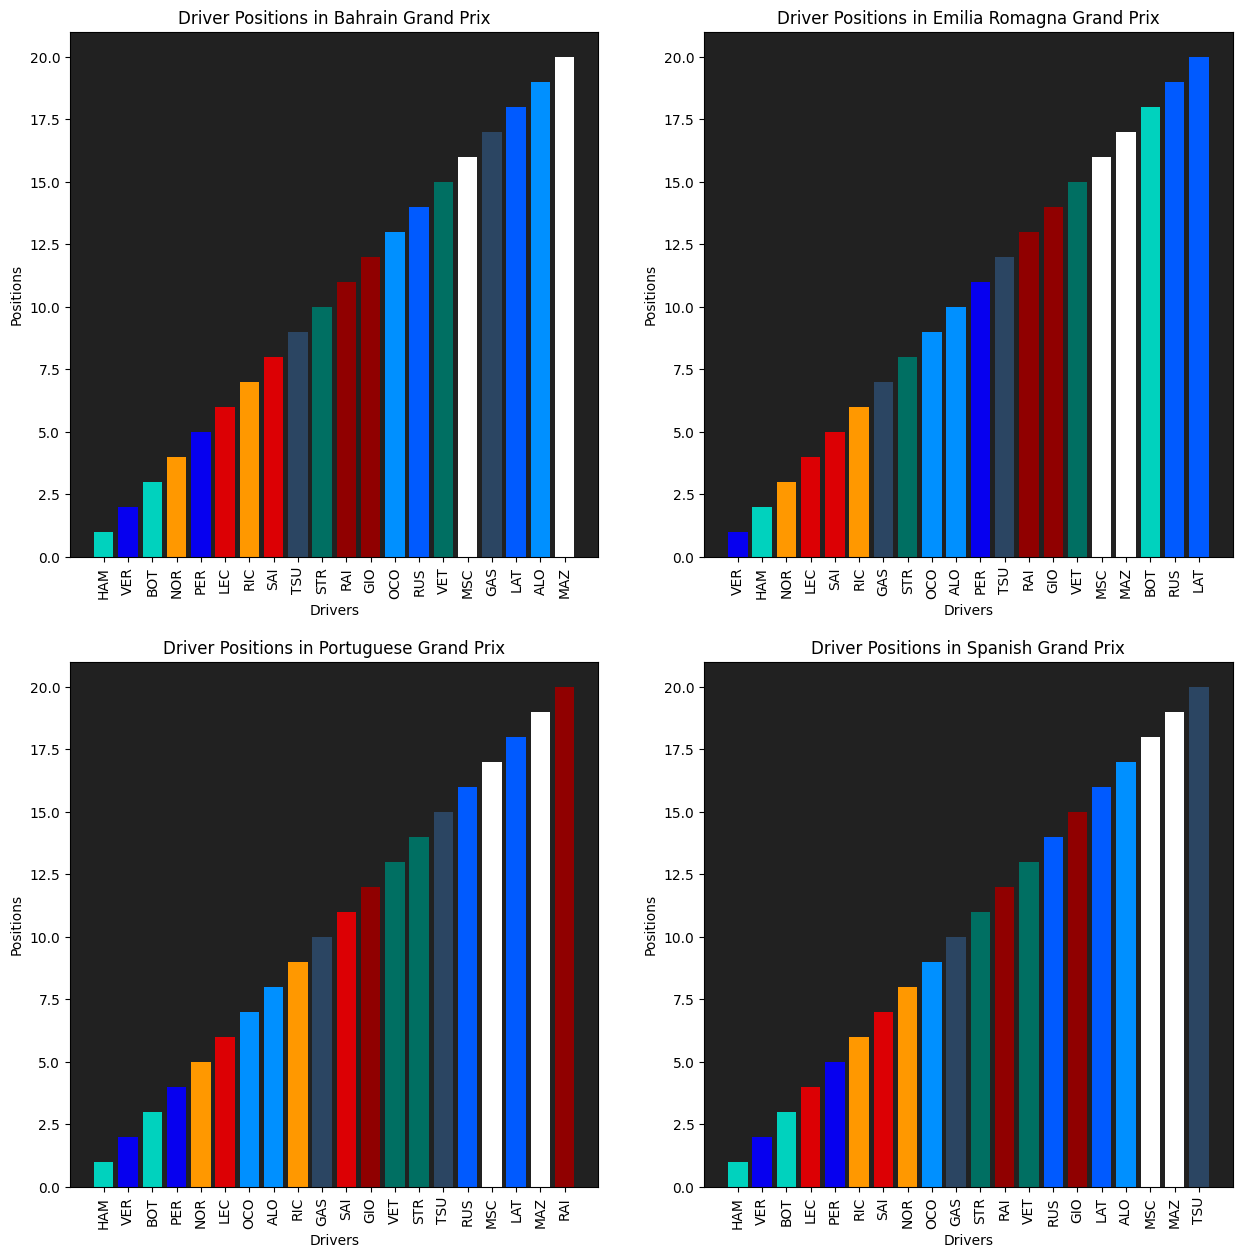

In [2]:
event_schedule = fastf1.get_event_schedule(2021, include_testing=False)

event_names = event_schedule.EventName

session = event_schedule.get_event_by_round(1).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]
 
f = plt.figure(figsize=(15, 15))

ax = f.add_subplot(2,2,1)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[1])

session = event_schedule.get_event_by_round(2).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]
 
ax = f.add_subplot(2,2,2)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[2])

session = event_schedule.get_event_by_round(3).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]
 
ax = f.add_subplot(2,2,3)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[3])

session = event_schedule.get_event_by_round(4).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]

ax = f.add_subplot(2,2,4)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[4])

plt.show()

#### How is car/driver performance affected by circumstantial factors?

In [3]:
event_schedule = fastf1.get_event_schedule(2021, include_testing=True)
session = event_schedule.get_event_by_round(1).get_race()
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']


In [4]:
laps = session.laps.pick_driver('VER')

filter1 = laps["Compound"]=="MEDIUM"
data1 = laps.where(filter1, inplace = False).dropna(how="all")

filter2 = laps["Compound"]=="HARD"
data2 = laps.where(filter2, inplace = False).dropna(how="all")

filter3 = laps["FreshTyre"]==False
data3 = laps.where(filter3, inplace = False).dropna(how="all")

filter4 = laps["FreshTyre"]==True
data4 = laps.where(filter4, inplace = False).dropna(how="all")

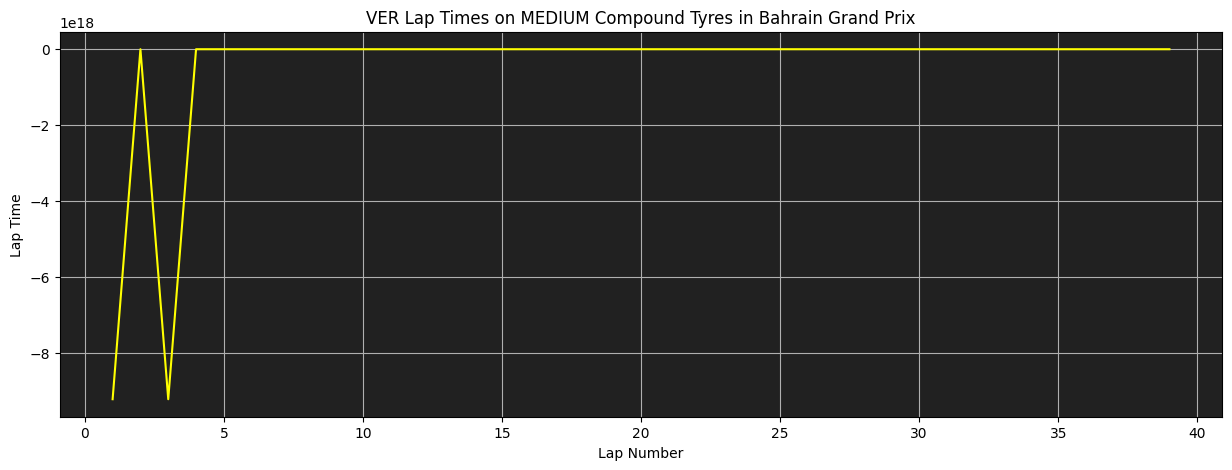

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data1["LapNumber"], data1["LapTime"], color='yellow')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on MEDIUM Compound Tyres in ' + event_names[1])
ax.grid()

plt.show()

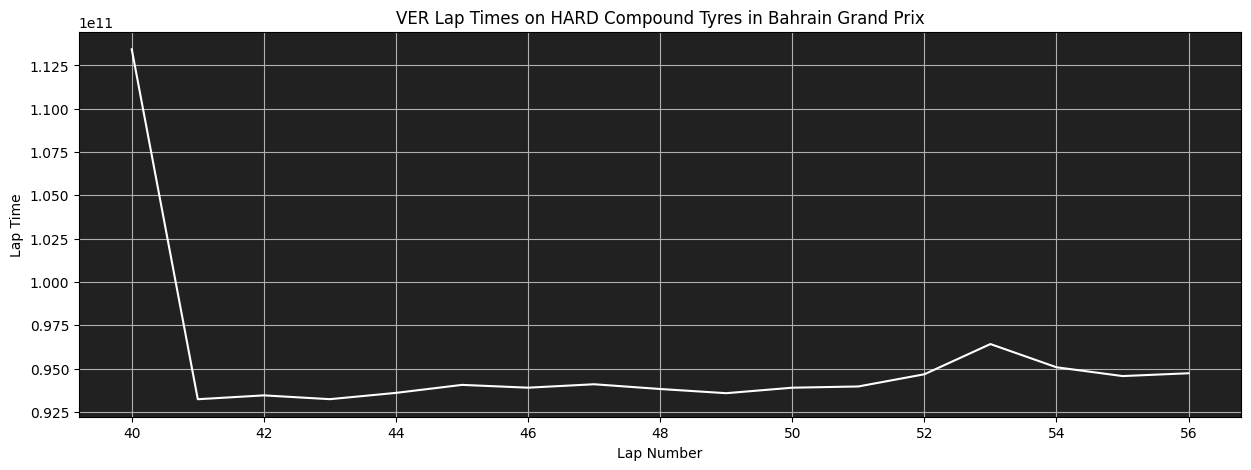

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data2["LapNumber"], data2["LapTime"], color='white')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on HARD Compound Tyres in ' + event_names[1])
ax.grid()

plt.show()

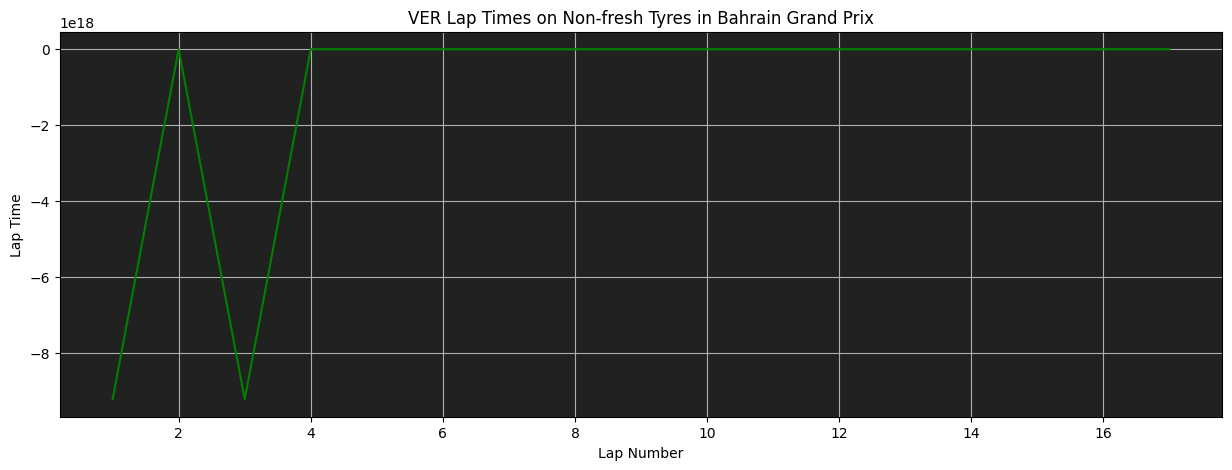

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data3["LapNumber"], data3["LapTime"], color='green')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on Non-fresh Tyres in ' + event_names[1])
ax.grid()

plt.show()

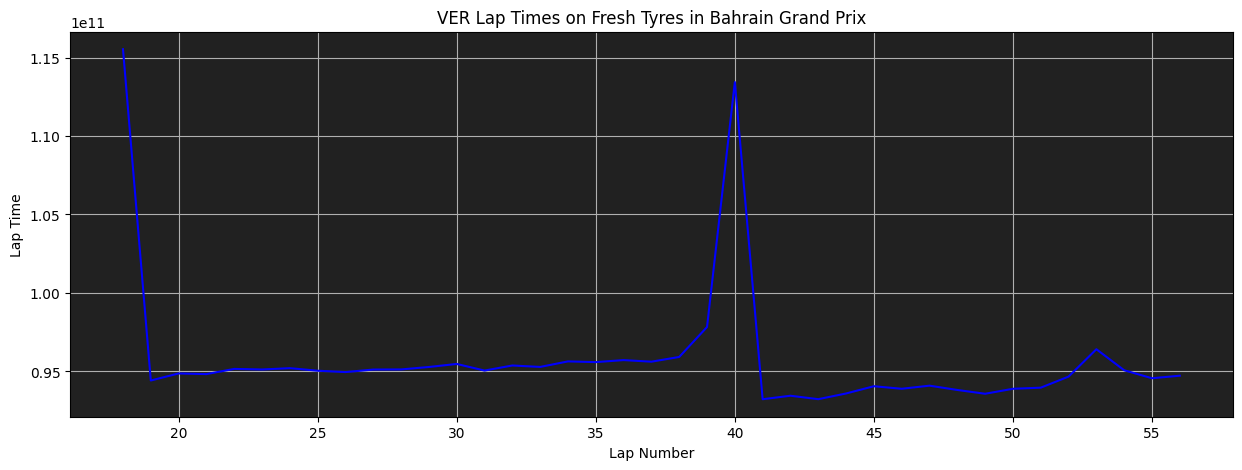

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data4["LapNumber"], data4["LapTime"], color='blue')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on Fresh Tyres in ' + event_names[1])
ax.grid()

plt.show()

#### New Research Questions
- How do the drivers compare in fastest lap times on different tyres during the race?
- What are the preferred tyres at the start and end of the race?


### How do the drivers compare in fastest lap times in different tyres during the race?

In [18]:
event_schedule = fastf1.get_event_schedule(2021, include_testing=False)
session = event_schedule.get_event_by_round(1).get_race()
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']


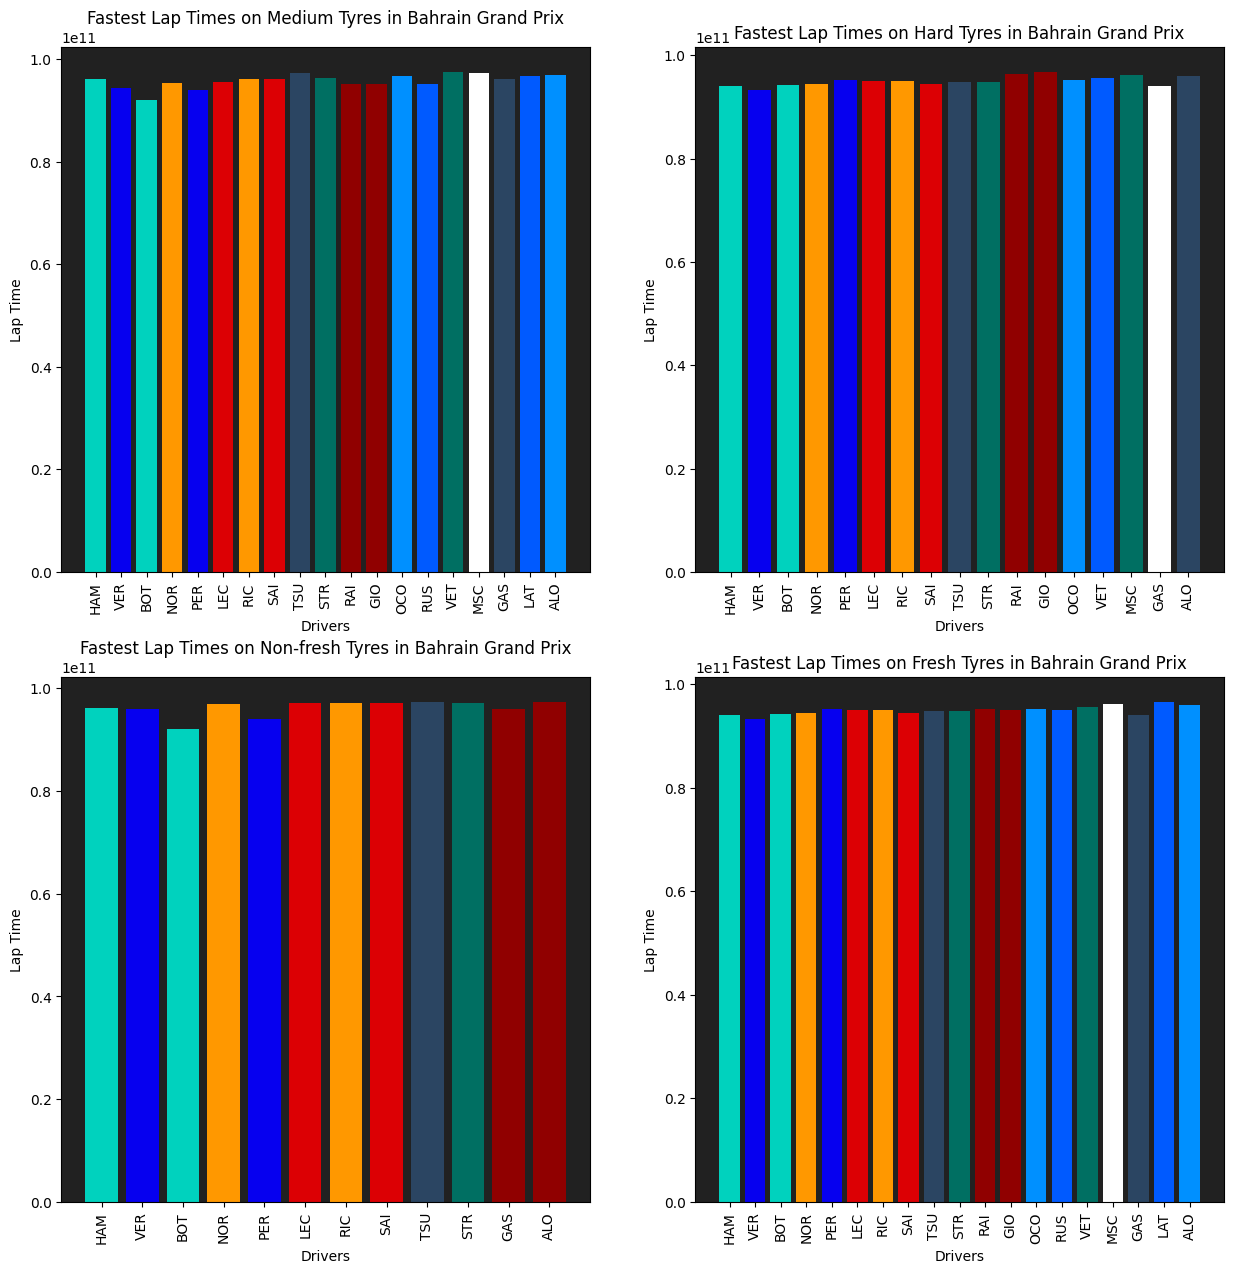

In [158]:
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_colors = ['#' + c for c in session_results.TeamColor]

# Medium Tyres
result = pd.DataFrame(columns=session.laps.columns)

for abbrev in drivers_abbreviations:
    laps = session.laps.pick_driver(abbrev)
    data5 = laps.where(laps["Compound"]=="MEDIUM", inplace = False).dropna(how="all")
    data6 = data5.loc[data5['LapTime'] == data5['LapTime'].min()]
    result = result.append(data6)

f = plt.figure(figsize=(15, 15))

ax = f.add_subplot(2,2,1)
ax.bar(result['Driver'], result['LapTime'], color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time')
ax.set_title('Fastest Lap Times on Medium Tyres in ' + event_names[1])

# Hard Tyres
result = pd.DataFrame(columns=session.laps.columns)

for abbrev in drivers_abbreviations:
    laps = session.laps.pick_driver(abbrev)
    data5 = laps.where(laps["Compound"]=="HARD", inplace = False).dropna(how="all")
    data6 = data5.loc[data5['LapTime'] == data5['LapTime'].min()]
    result = result.append(data6)

ax = f.add_subplot(2,2,2)
ax.bar(result['Driver'], result['LapTime'], color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time')
ax.set_title('Fastest Lap Times on Hard Tyres in ' + event_names[1])

# Non-fresh Tyres
result = pd.DataFrame(columns=session.laps.columns)

for abbrev in drivers_abbreviations:
    laps = session.laps.pick_driver(abbrev)
    data5 = laps.where(laps["FreshTyre"]==False, inplace = False).dropna(how="all")
    data6 = data5.loc[data5['LapTime'] == data5['LapTime'].min()]
    result = result.append(data6)

ax = f.add_subplot(2,2,3)
ax.bar(result['Driver'], result['LapTime'], color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time')
ax.set_title('Fastest Lap Times on Non-fresh Tyres in ' + event_names[1])

# Fresh Tyres
result = pd.DataFrame(columns=session.laps.columns)

for abbrev in drivers_abbreviations:
    laps = session.laps.pick_driver(abbrev)
    data5 = laps.where(laps["FreshTyre"]==True, inplace = False).dropna(how="all")
    data6 = data5.loc[data5['LapTime'] == data5['LapTime'].min()]
    result = result.append(data6)

ax = f.add_subplot(2,2,4)
ax.bar(result['Driver'], result['LapTime'], color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time')
ax.set_title('Fastest Lap Times on Fresh Tyres in ' + event_names[1])

plt.show()

### What are the preferred tyres at the start and end of the race?

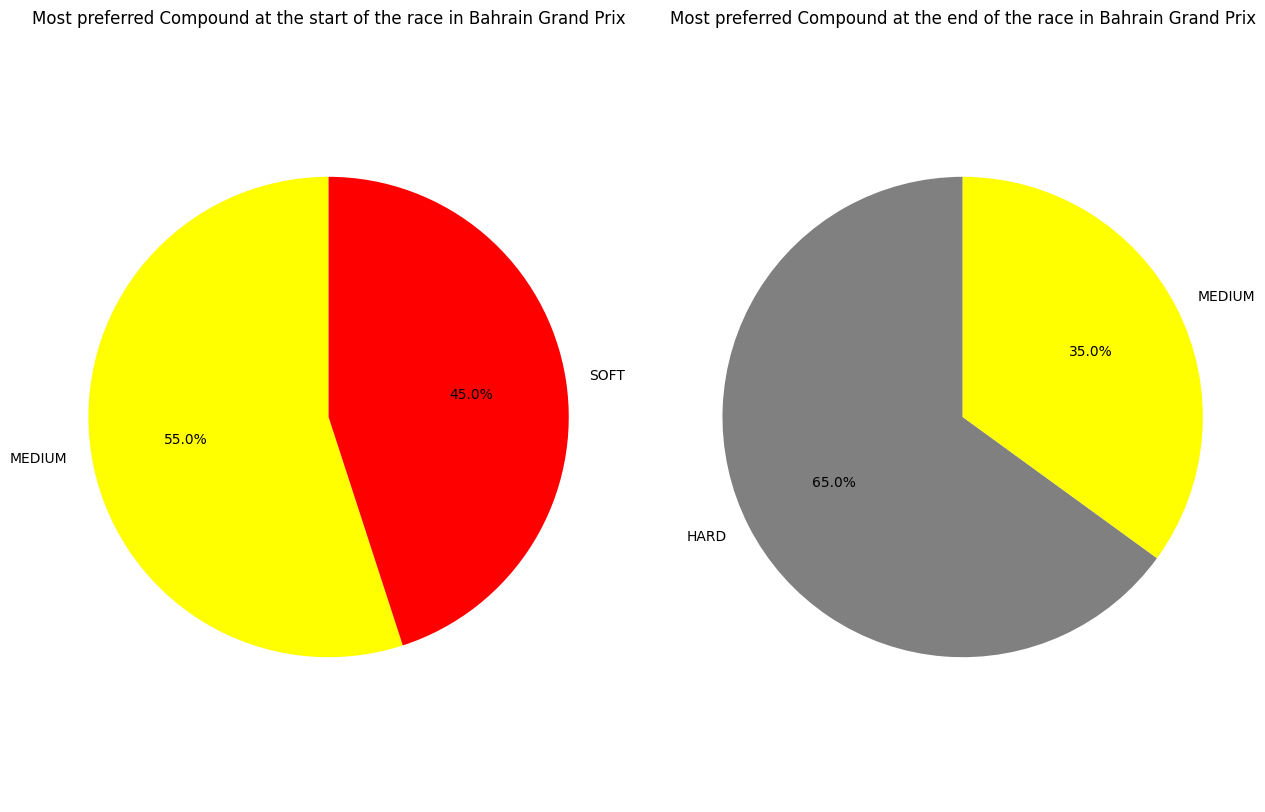

In [156]:
# Tyres at the start of the race
result = pd.DataFrame(columns=session.laps.columns)

for abbrev in drivers_abbreviations:
    laps = session.laps.pick_driver(abbrev).dropna(how='all')
    data7 = laps.loc[laps['Time'] == laps['Time'].min()]
    result = result.append(data7)

f = plt.figure(figsize=(15, 10))

df = result['Compound'].value_counts()
labels = list(df.index)
values = list(df.values)

ax = f.add_subplot(1,2,1)
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['yellow', 'red'])
ax.axis('equal')
ax.set_title('Most preferred Compound at the start of the race in ' + event_names[1])

# Tyres at the end of the race
result = pd.DataFrame(columns=session.laps.columns)

for abbrev in drivers_abbreviations:
    laps = session.laps.pick_driver(abbrev).dropna(how='all')
    data7 = laps.loc[laps['Time'] == laps['Time'].max()]
    result = result.append(data7)

df = result['Compound'].value_counts()
labels = list(df.index)
values = list(df.values)

ax = f.add_subplot(1,2,2)
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['grey', 'yellow'])
ax.axis('equal')
ax.set_title('Most preferred Compound at the end of the race in ' + event_names[1])

plt.show()

### Conclusion

- The fastest lap time on medium tyres was set by BOT.
- The fastest lap time on hard tyres was set by VER.
- The medium compound is the most preferred at the start of the race.
- The hard compound is the most preferred at the end of the race.